In [1]:
import itertools
import numpy
from Bio import SeqIO
from Bio.Seq import Seq
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML, display
from copy import copy

In [2]:
WINDOW=10
def build_matrix(seq1: Seq, seq2: Seq, max_window: int = WINDOW, min_window=1):
    """
    Primeira sequência é a coluna e segunda é a linha.
    Retorna a soma de todas as janelas em 2 dimensões, na normal e na reversa.

    :rtype: numpy array (len segunda, len primeira, 2)
    """
    len2 = len(seq2)
    len1 = len(seq1)
    seq1 = str(seq1.upper())
    seq2_reverse = str(seq2.upper().reverse_complement())
    seq2_invert = str(seq2.upper())[::-1]
    seq2 = str(seq2.upper())
    rows = numpy.zeros((len2, len1, 3))

    for w in range(min_window, max_window+1):
        for b in range(0, len2-w+1):
            for r in range(0, len1-w+1):
                if seq1[r:r+w] == seq2[b:b+w]:
                    numpy.fill_diagonal(rows[b:b+w, r:r+w, 0], w)
                if seq1[r:r+w] == seq2_reverse[b:b+w]:
                    numpy.fill_diagonal(rows[:, ::-1][b:b+w, r:r+w, 1], w)
                if seq1[r:r+w] == seq2_invert[b:b+w]:
                    numpy.fill_diagonal(rows[:, ::-1][b:b+w, r:r+w, 2], w)

    return rows

In [60]:
%%time
matrices = list()
names = list()
max_window = 20
min_window = 1
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 47min 11s, sys: 364 ms, total: 47min 12s
Wall time: 47min 10s


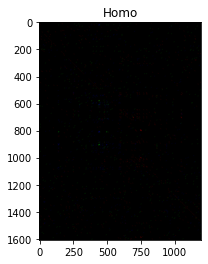

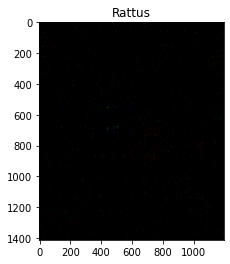

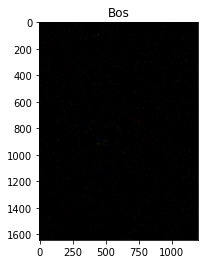

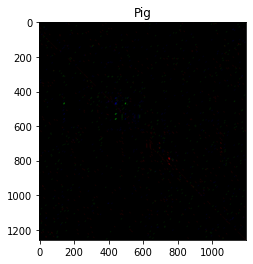

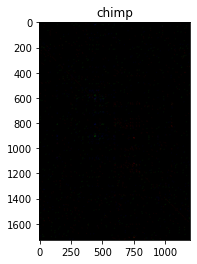

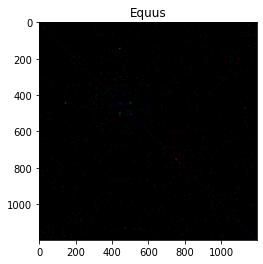

In [12]:
size = len(matrices)
side = int(size**0.5)
for j in range(side):
    fig, ax = plt.subplots()
    camera = Camera(fig)
    ax.set_title(names[side*j][0])
    for i in range(j, size, side):
        ax.imshow((matrices[i]*500).astype(numpy.uint8), interpolation="bilinear")
        camera.snap()
    display(HTML(camera.animate().to_html5_video()))

In [61]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))

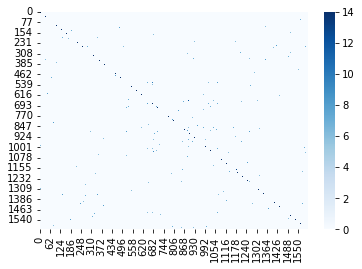

In [13]:
m = matrices[0][:,:,0]
ax = sns.heatmap(m, cmap=sns.color_palette("Blues", as_cmap=True))


In [15]:
def print_matrices(matrices, names, index=0):
    fig = plt.figure(figsize = (20,20)) # width x height
    size = len(matrices)
    side = int(size**0.5)
    cmap = sns.color_palette("Blues", as_cmap=True)
    for i in range(size):
        m = matrices[i][:,:,index]
        l = i//side
        ax = fig.add_subplot(side, side, i+1, title=f"{names[i][0]}x{names[i][1]}")
        sns.heatmap(data=m, ax=ax, cmap=cmap, xticklabels=False, yticklabels=False, cbar=False)

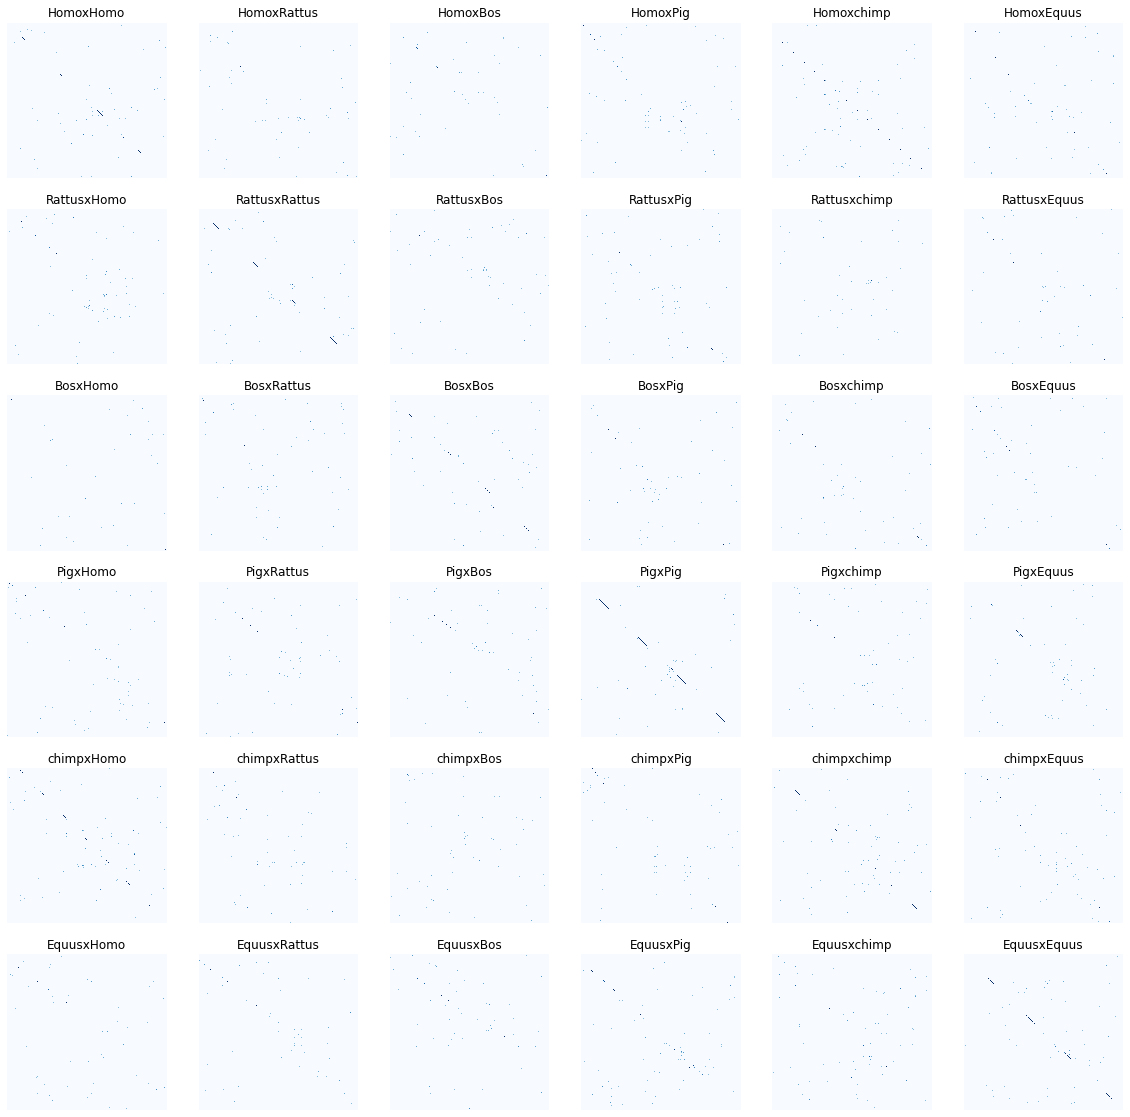

In [16]:
print_matrices(matrices, names)

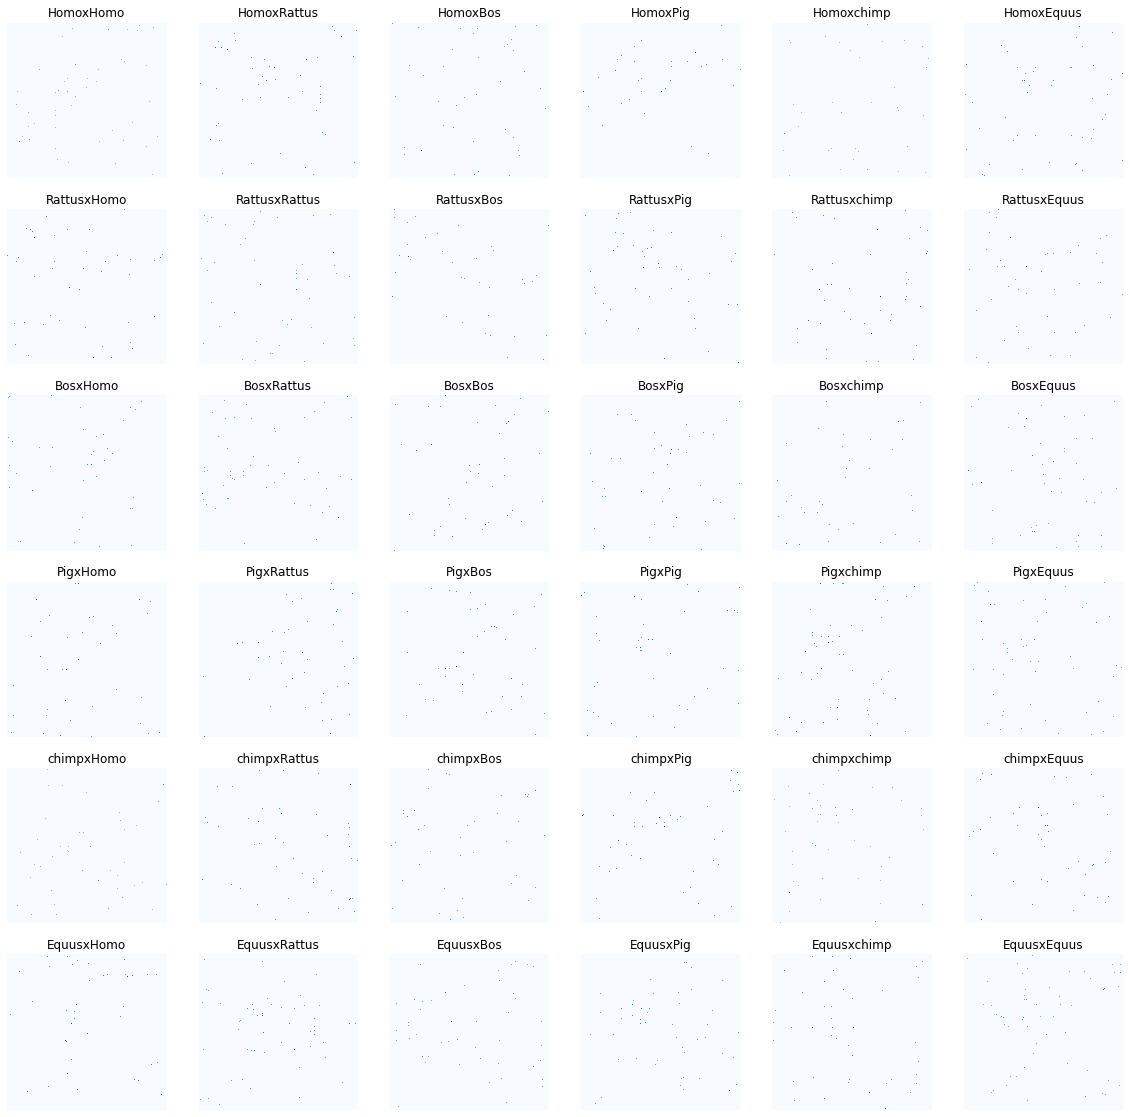

In [17]:
print_matrices(matrices, names, 1)

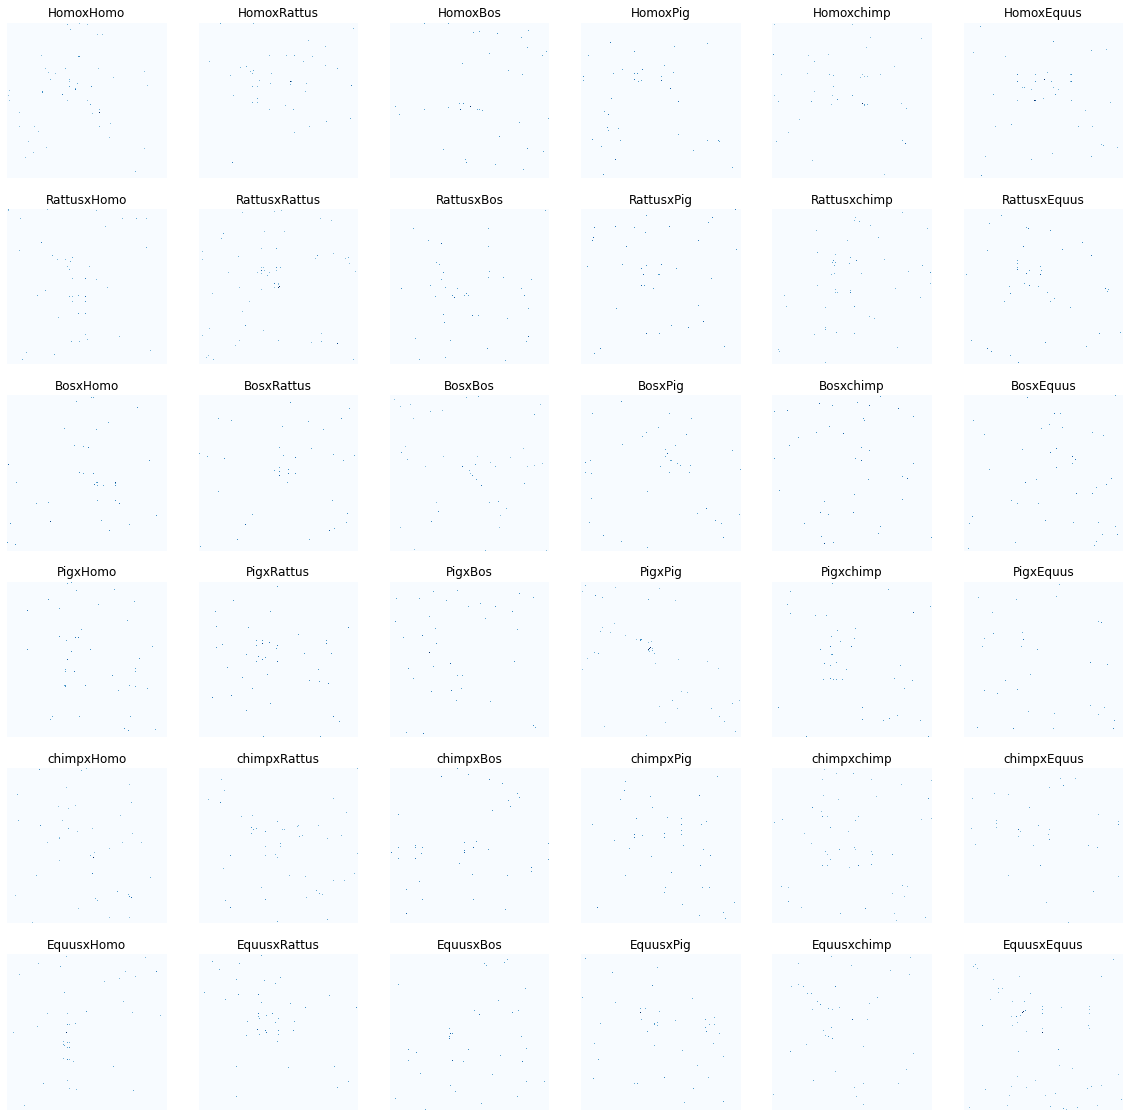

In [18]:
print_matrices(matrices, names, 2)

In [24]:
from DeepImageSearch import Index,LoadData,SearchImage

2021-11-08 19:25:24.591670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 19:25:24.591944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [62]:
image_list = LoadData().from_folder(['data/images'])

In [63]:
Index(image_list).Start()

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:11<00:00,  3.17it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 1476.93it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


In [64]:
image_list[7]

'data/images/hemoglobin_chimpxchimp.png'

In [65]:
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 2: 'data/images/hemoglobin_BosxEquus.png',
 12: 'data/images/hemoglobin_EquusxBos.png'}

In [66]:
image_list[28]

'data/images/hemoglobin_PigxPig.png'

In [67]:
SearchImage().get_similar_images(image_path=image_list[28], number_of_images=10)

{28: 'data/images/hemoglobin_PigxPig.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 7: 'data/images/hemoglobin_chimpxchimp.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 12: 'data/images/hemoglobin_EquusxBos.png',
 26: 'data/images/hemoglobin_PigxEquus.png'}

In [70]:
image_list[19]

'data/images/hemoglobin_Homoxchimp.png'

In [71]:
SearchImage().get_similar_images(image_path=image_list[19], number_of_images=10)

{19: 'data/images/hemoglobin_Homoxchimp.png',
 7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 2: 'data/images/hemoglobin_BosxEquus.png',
 12: 'data/images/hemoglobin_EquusxBos.png'}

In [72]:
image_list[9]

'data/images/hemoglobin_chimpxHomo.png'

In [73]:
SearchImage().get_similar_images(image_path=image_list[9], number_of_images=10)

{9: 'data/images/hemoglobin_chimpxHomo.png',
 7: 'data/images/hemoglobin_chimpxchimp.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 12: 'data/images/hemoglobin_EquusxBos.png',
 2: 'data/images/hemoglobin_BosxEquus.png'}

In [78]:
image_list[26]

'data/images/hemoglobin_PigxEquus.png'

In [79]:
SearchImage().get_similar_images(image_path=image_list[26], number_of_images=10)

{26: 'data/images/hemoglobin_PigxEquus.png',
 16: 'data/images/hemoglobin_EquusxPig.png',
 32: 'data/images/hemoglobin_RattusxEquus.png',
 20: 'data/images/hemoglobin_HomoxEquus.png',
 31: 'data/images/hemoglobin_Rattusxchimp.png',
 33: 'data/images/hemoglobin_RattusxHomo.png',
 8: 'data/images/hemoglobin_chimpxEquus.png',
 15: 'data/images/hemoglobin_EquusxHomo.png',
 27: 'data/images/hemoglobin_PigxHomo.png',
 34: 'data/images/hemoglobin_RattusxPig.png'}

In [90]:
image_list[30]

'data/images/hemoglobin_RattusxBos.png'

In [93]:
SearchImage().get_similar_images(image_path=image_list[30], number_of_images=10)

{30: 'data/images/hemoglobin_RattusxBos.png',
 5: 'data/images/hemoglobin_BosxRattus.png',
 18: 'data/images/hemoglobin_HomoxBos.png',
 24: 'data/images/hemoglobin_PigxBos.png',
 12: 'data/images/hemoglobin_EquusxBos.png',
 6: 'data/images/hemoglobin_chimpxBos.png',
 29: 'data/images/hemoglobin_PigxRattus.png',
 2: 'data/images/hemoglobin_BosxEquus.png',
 23: 'data/images/hemoglobin_HomoxRattus.png',
 33: 'data/images/hemoglobin_RattusxHomo.png'}

In [50]:
%%time
matrices = list()
names = list()
max_window = 20
min_window = 3
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 18min 18s, sys: 0 ns, total: 18min 18s
Wall time: 18min 18s


In [51]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))
image_list = LoadData().from_folder(['data/images'])
Index(image_list).Start()
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:08<00:00,  4.20it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 2752.62it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 2: 'data/images/hemoglobin_BosxEquus.png',
 12: 'data/images/hemoglobin_EquusxBos.png'}

In [52]:
%%time
matrices = list()
names = list()
max_window = 20
min_window = 6
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 10min 3s, sys: 0 ns, total: 10min 3s
Wall time: 10min 2s


In [53]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))
image_list = LoadData().from_folder(['data/images'])
Index(image_list).Start()
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:09<00:00,  3.70it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 1935.58it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 18: 'data/images/hemoglobin_HomoxBos.png',
 2: 'data/images/hemoglobin_BosxEquus.png'}

In [54]:
%%time
matrices = list()
names = list()
max_window = 14
min_window = 3
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 8min 49s, sys: 0 ns, total: 8min 49s
Wall time: 8min 49s


In [55]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))
image_list = LoadData().from_folder(['data/images'])
Index(image_list).Start()
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:09<00:00,  3.82it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 2393.59it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 2: 'data/images/hemoglobin_BosxEquus.png',
 18: 'data/images/hemoglobin_HomoxBos.png'}

In [56]:
%%time
matrices = list()
names = list()
max_window = 14
min_window = 1
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 12min 2s, sys: 0 ns, total: 12min 2s
Wall time: 12min 2s


In [57]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))
image_list = LoadData().from_folder(['data/images'])
Index(image_list).Start()
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:10<00:00,  3.51it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 2189.86it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 28: 'data/images/hemoglobin_PigxPig.png',
 18: 'data/images/hemoglobin_HomoxBos.png',
 12: 'data/images/hemoglobin_EquusxBos.png'}

In [58]:
%%time
matrices = list()
names = list()
max_window = 10
min_window = 10
with open("data/gene.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0].seq, record[1].seq, max_window, min_window))
        names.append((record[0].id, record[1].id))

CPU times: user 41.5 s, sys: 567 µs, total: 41.5 s
Wall time: 41.5 s


In [59]:
size = len(matrices)
max_rgb = 255
for i in range(size):
    plt.imsave(f"data/images/hemoglobin_{names[i][0]}x{names[i][1]}.png",(matrices[i]*max_rgb/max_window).astype(numpy.uint8))
image_list = LoadData().from_folder(['data/images'])
Index(image_list).Start()
SearchImage().get_similar_images(image_path=image_list[7], number_of_images=10)

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:09<00:00,  3.85it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


36it [00:00, 2873.52it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


{7: 'data/images/hemoglobin_chimpxchimp.png',
 21: 'data/images/hemoglobin_HomoxHomo.png',
 19: 'data/images/hemoglobin_Homoxchimp.png',
 0: 'data/images/hemoglobin_BosxBos.png',
 9: 'data/images/hemoglobin_chimpxHomo.png',
 35: 'data/images/hemoglobin_RattusxRattus.png',
 14: 'data/images/hemoglobin_EquusxEquus.png',
 24: 'data/images/hemoglobin_PigxBos.png',
 4: 'data/images/hemoglobin_BosxPig.png',
 18: 'data/images/hemoglobin_HomoxBos.png'}

In [ ]:
# olhar álcool desidrogenase pq tem repetições